In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset_file_path = 'Global Superstore lite.xlsx'
sheet_names = ['Orders', 'Returns', 'People']
data_frames = {}
for sheet_name in sheet_names:
    data_frames[sheet_name] = pd.read_excel(dataset_file_path, sheet_name=sheet_name)

#Access each DataFrame
Orders_df = data_frames['Orders']
Returns_df = data_frames['Returns']
People_df = data_frames['People']

# Data Cleaning

In [3]:
#Identifying missing values
GSS_missingValues = Orders_df.isnull().sum()
print(GSS_missingValues)

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Postal Code       803
Market              0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64


In [4]:
#Dropping columns with missing values
Orders_df.dropna(axis=1, inplace=True)

In [5]:
#Identifying duplicate rows
GSS_dupRows = Orders_df.duplicated().sum()
print(GSS_dupRows)

0


In [6]:
#Identifying data types in the orders sheet
print(Orders_df.dtypes)

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object


In [7]:
Orders_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [8]:
#Saving the cleaned Dataset

Cleaned_DataSet = 'cleaned_data.xlsx'

with pd.ExcelWriter(Cleaned_DataSet) as writer:
 
    Orders_df.to_excel(writer, sheet_name = 'Orders', index=False)
    Returns_df.to_excel(writer, sheet_name = 'Returns', index=False)
    People_df.to_excel(writer, sheet_name = 'People', index=False)

# Market Basket Analysis, Association rule generation and statistical model development

In [9]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [10]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Read the cleaned dataset
cleaned_data = pd.read_excel("cleaned_data.xlsx")

# Group by 'Order ID' and 'Sub-Category' and count the occurrences of each combination
basket = (cleaned_data.groupby(['Order ID', 'Sub-Category'])['Row ID']
          .count().unstack().reset_index().fillna(0)
          .set_index('Order ID'))

# Convert the occurrence counts to binary values (0 or 1)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

#Generating frequent itemsets using the Apriori algorithm (Market Basket Analysis)
frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True)

# Generate association rules using the frequent itemsets and specify the metric and minimum threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift']]

rules

C:\Users\User\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(Bookcases),(Supplies),0.140461,0.006289,0.001048,0.007463,1.186567
1,(Supplies),(Bookcases),0.006289,0.140461,0.001048,0.166667,1.186567
2,"(Tables, Bookcases)",(Chairs),0.001048,0.119497,0.001048,1.000000,8.368421
3,"(Bookcases, Chairs)",(Tables),0.001048,0.106918,0.001048,1.000000,9.352941
4,"(Tables, Chairs)",(Bookcases),0.002096,0.140461,0.001048,0.500000,3.559701
5,(Bookcases),"(Tables, Chairs)",0.140461,0.002096,0.001048,0.007463,3.559701
6,(Tables),"(Bookcases, Chairs)",0.106918,0.001048,0.001048,0.009804,9.352941
7,(Chairs),"(Tables, Bookcases)",0.119497,0.001048,0.001048,0.008772,8.368421


In [11]:
# Creating an empty DataFrame 
binary_subcategories = pd.DataFrame(index=basket.index)

# Iterate over unique sub-categories
for sub_category in cleaned_data['Sub-Category'].unique():
    # Create a binary column indicating presence of sub-category
    binary_subcategories[sub_category] = (basket[sub_category] > 0).astype(int)

# Displaying the binary representation of sub-categories
binary_subcategories


,Accessories,Chairs,Phones,Copiers,Tables,Binders,Supplies,Appliances,Machines,Bookcases,Storage,Furnishings
Order ID,,,,,,,,,,,,
AG-2011-8180,0,0,0,0,0,0,0,0,1,0,0,0
AJ-2013-2640,0,0,0,0,1,0,0,0,0,0,0,0
AL-2011-7440,0,0,0,0,0,0,0,0,1,0,0,0
AL-2013-3830,0,0,1,0,0,0,0,0,0,0,0,0
AO-2011-1670,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
US-2014-167402,0,0,0,0,0,0,1,0,0,0,0,0
US-2014-168046,0,0,0,0,1,0,0,0,0,0,0,0
US-2014-168116,0,0,0,0,0,0,0,0,1,0,0,0


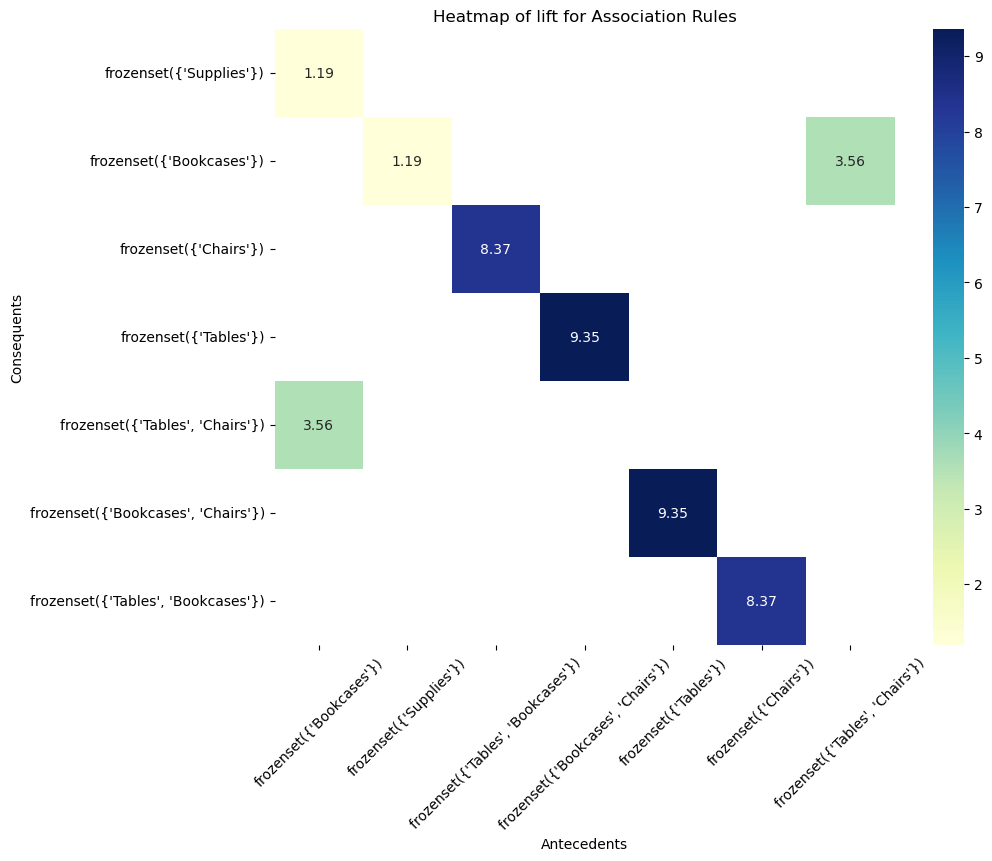

In [12]:
#Heatmap of the the association rules

import seaborn as sns
import matplotlib.pyplot as plt

#Pivot the rules DataFrame to create a table for the heatmap
HeatMapTable = rules.pivot(index='consequents', columns='antecedents', values='lift')

#Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(HeatMapTable, cmap='YlGnBu', annot=True, fmt=".2f", cbar=True)

#Set plot titles and labels
plt.title('Heatmap of lift for Association Rules')
plt.xlabel('Antecedents')
plt.ylabel('Consequents')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

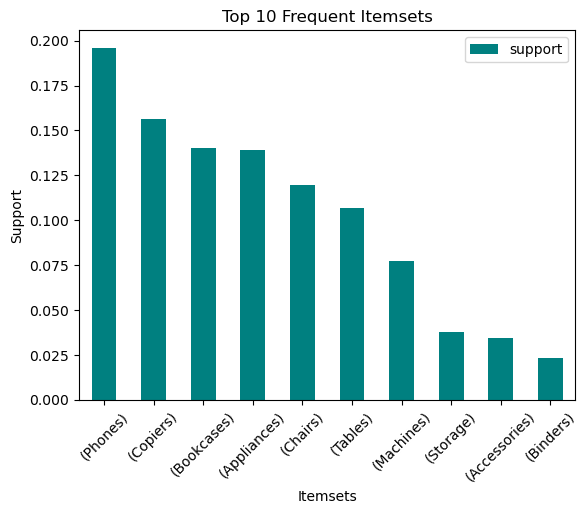

In [13]:
#Barplot of support for Sub-category items 
sorted_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
sorted_itemsets.head(10).plot(kind='bar', x='itemsets', y='support', color='teal')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.xticks(rotation=45)
plt.show()

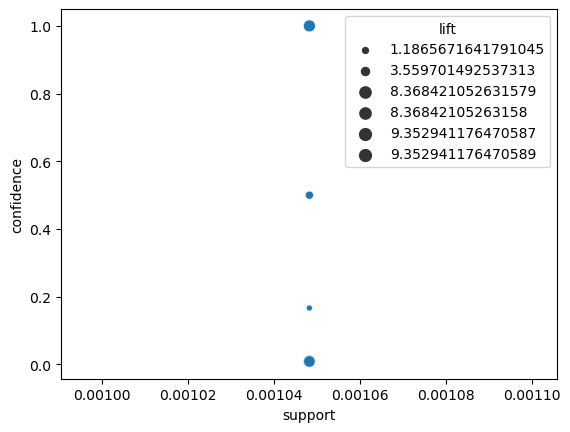

In [14]:
#Plotting a scatterplot
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = rules)
plt.show()

# Error Margin Estimation

In [15]:
metrics = ['support', 'confidence', 'lift']

for metric in metrics:
    rules[f'{metric}_std_err'] = np.sqrt((rules[metric] * (1 - rules[metric])) / len(basket_sets))
    rules[f'{metric}_error_margin'] = 1.96 * rules[f'{metric}_std_err']  
    rules[f'{metric}_lower'] = rules[metric] - rules[f'{metric}_error_margin']
    rules[f'{metric}_upper'] = rules[metric] + rules[f'{metric}_error_margin']

def ErrorMarginTable():
    ErrorMarginTable = pd.concat([
        rules[['antecedents', 'consequents']],
        rules[['support', 'support_lower', 'support_upper']],
        rules[['confidence', 'confidence_lower', 'confidence_upper']],
        rules[['lift', 'lift_lower', 'lift_upper']]
    ], axis=1)
    return ErrorMarginTable

ErrorMarginTable()

C:\Users\User\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,antecedents,consequents,support,support_lower,support_upper,confidence,confidence_lower,confidence_upper,lift,lift_lower,lift_upper
0,(Bookcases),(Supplies),0.001048,-0.001005,0.003102,0.007463,0.002001,0.012924,1.186567,NaN,NaN
1,(Supplies),(Bookcases),0.001048,-0.001005,0.003102,0.166667,0.143018,0.190316,1.186567,NaN,NaN
2,"(Tables, Bookcases)",(Chairs),0.001048,-0.001005,0.003102,1.000000,1.000000,1.000000,8.368421,NaN,NaN
3,"(Bookcases, Chairs)",(Tables),0.001048,-0.001005,0.003102,1.000000,1.000000,1.000000,9.352941,NaN,NaN
4,"(Tables, Chairs)",(Bookcases),0.001048,-0.001005,0.003102,0.500000,0.468271,0.531729,3.559701,NaN,NaN
5,(Bookcases),"(Tables, Chairs)",0.001048,-0.001005,0.003102,0.007463,0.002001,0.012924,3.559701,NaN,NaN
6,(Tables),"(Bookcases, Chairs)",0.001048,-0.001005,0.003102,0.009804,0.003552,0.016056,9.352941,NaN,NaN
7,(Chairs),"(Tables, Bookcases)",0.001048,-0.001005,0.003102,0.008772,0.002855,0.014689,8.368421,NaN,NaN


# Other

In [16]:
#Group orders by 'Order ID' and create a list of subcategories for each order
baskets = cleaned_data.groupby('Order ID')['Sub-Category'].apply(list).reset_index(name='Basket')

#Count the occurrences of each subcategory across all baskets
No_Of_Baskets = baskets['Basket'].explode().value_counts()

#Print the number of baskets for each unique subcategory
print(No_Of_Baskets)


Basket
Phones         190
Copiers        150
Bookcases      136
Appliances     133
Chairs         114
Tables         103
Machines        75
Storage         36
Accessories     33
Binders         22
Supplies         6
Furnishings      1
Name: count, dtype: int64


In [17]:
#Count the occurrences of each unique basket of subcategories
basket_counts = baskets['Basket'].apply(lambda x: tuple(sorted(x))).value_counts()

#Print the count for each unique basket
for basket, count in basket_counts.items():
    print(f"{basket}: {count}")


('Phones',): 172
('Copiers',): 137
('Appliances',): 125
('Bookcases',): 124
('Chairs',): 104
('Tables',): 98
('Machines',): 65
('Storage',): 33
('Accessories',): 27
('Binders',): 22
('Supplies',): 5
('Bookcases', 'Copiers'): 4
('Appliances', 'Phones'): 4
('Machines', 'Phones'): 4
('Copiers', 'Storage'): 2
('Accessories', 'Chairs'): 2
('Accessories', 'Machines'): 2
('Phones', 'Phones'): 2
('Copiers', 'Phones'): 2
('Chairs', 'Copiers'): 2
('Bookcases', 'Bookcases'): 2
('Phones', 'Tables'): 1
('Appliances', 'Bookcases'): 1
('Bookcases', 'Phones', 'Phones'): 1
('Chairs', 'Phones'): 1
('Chairs', 'Machines'): 1
('Copiers', 'Machines'): 1
('Furnishings',): 1
('Appliances', 'Chairs'): 1
('Bookcases', 'Chairs', 'Tables', 'Tables'): 1
('Chairs', 'Storage'): 1
('Appliances', 'Copiers', 'Copiers'): 1
('Accessories', 'Tables'): 1
('Bookcases', 'Supplies'): 1
('Chairs', 'Tables'): 1
('Accessories', 'Appliances'): 1
('Machines', 'Machines'): 1
